## Ridge and Lasso Regression

### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/AQI_P/AQI-Project/AQI-Project/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


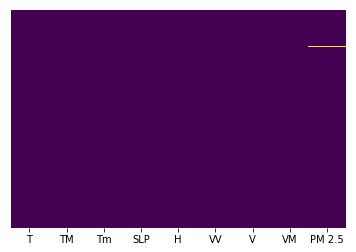

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df=df.dropna()

In [17]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [18]:
## check null values
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [19]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
701    False
702    False
703    False
704    False
705    False
706    False
707    False
708    False
709    False
710    False
711    False
712    False
713    False
714    False
715    False
716    False
717    False
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
728    False
729    False
730    False
Name: PM 2.5, Length: 730, dtype: bool

C:\Users\MSI_PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MSI_PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


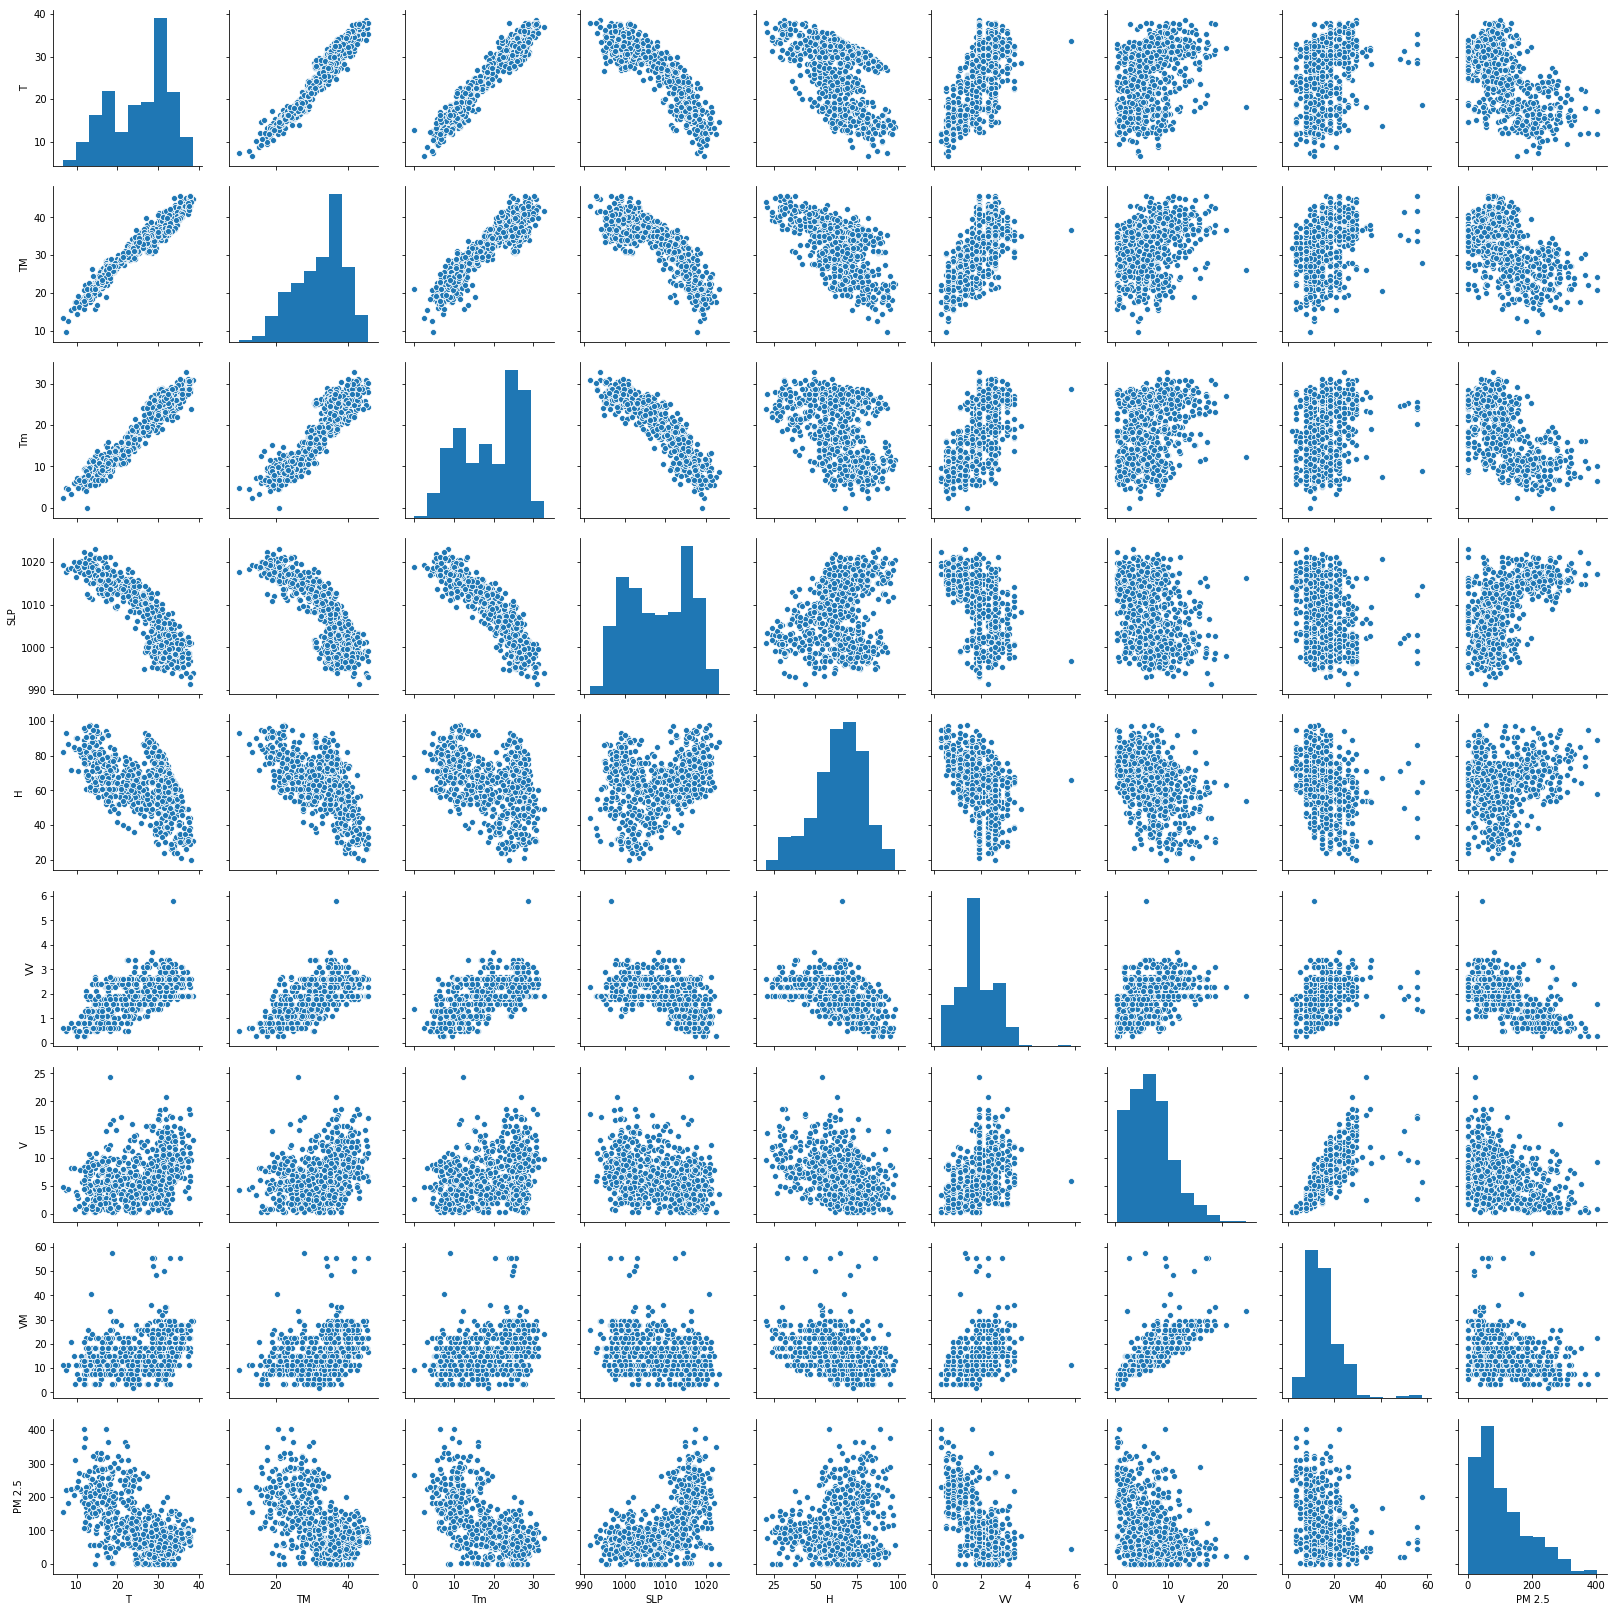

In [8]:
sns.pairplot(df)

In [12]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967323,0.958872,-0.884778,-0.520629,0.622441,0.326463,0.287869,-0.628336
TM,0.967323,1.000000,0.896628,-0.829935,-0.601433,0.598028,0.320478,0.300257,-0.569381
Tm,0.958872,0.896628,1.000000,-0.909582,-0.317057,0.560399,0.313298,0.260067,-0.669059
SLP,-0.884778,-0.829935,-0.909582,1.000000,0.277007,-0.491837,-0.346481,-0.300552,0.615615
H,-0.520629,-0.601433,-0.317057,0.277007,1.000000,-0.475249,-0.399293,-0.371552,0.174658
VV,0.622441,0.598028,0.560399,-0.491837,-0.475249,1.000000,0.403044,0.347714,-0.628621
V,0.326463,0.320478,0.313298,-0.346481,-0.399293,0.403044,1.000000,0.760858,-0.354799
VM,0.287869,0.300257,0.260067,-0.300552,-0.371552,0.347714,0.760858,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

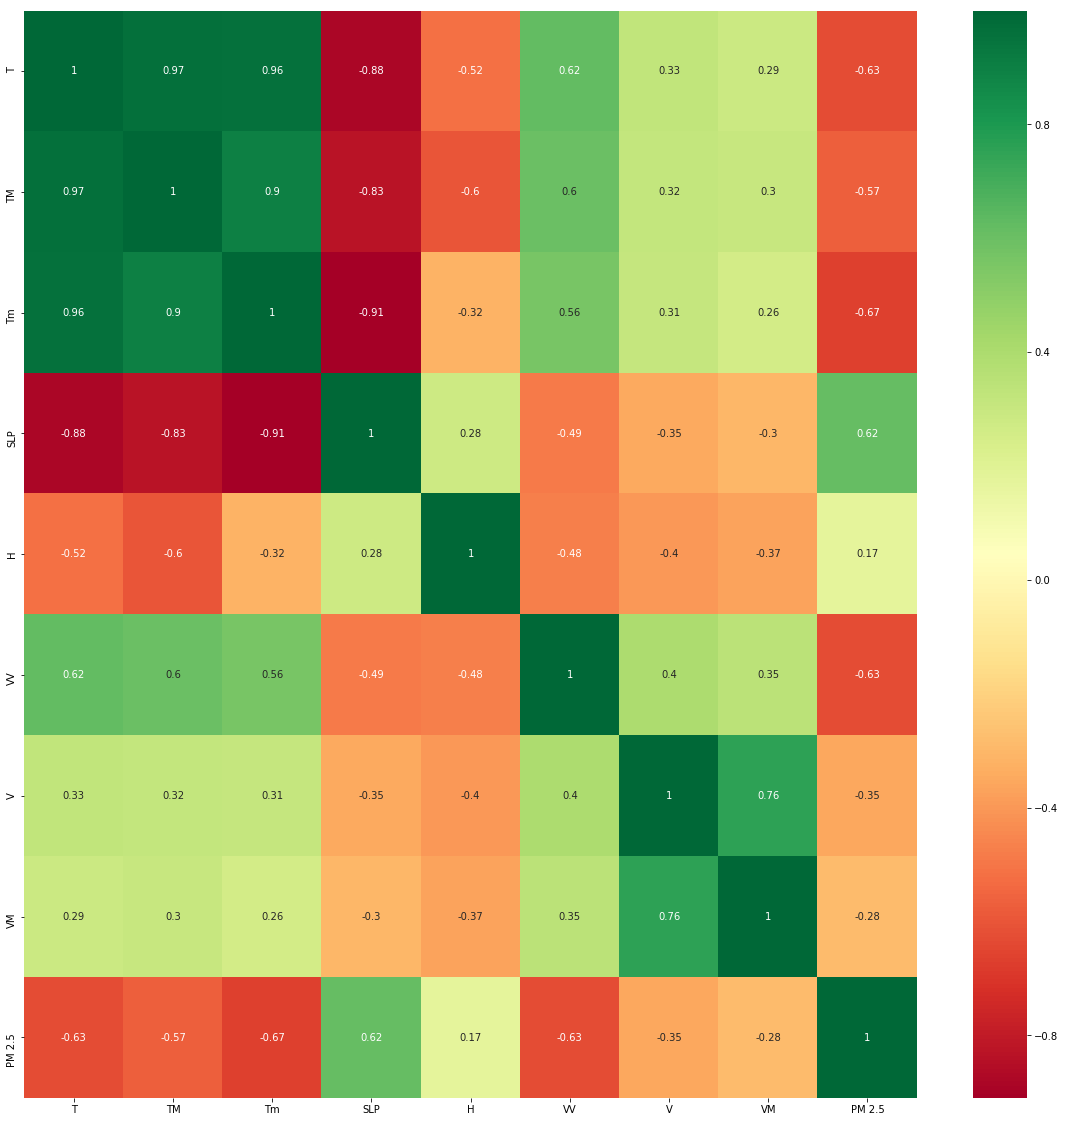

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\MSI_PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [15]:
print(model.feature_importances_)

[0.12685586 0.0531141  0.25665812 0.20894111 0.09418472 0.16821597
 0.04789896 0.04413115]


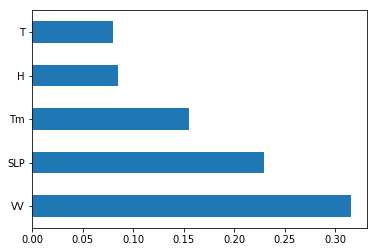

In [22]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

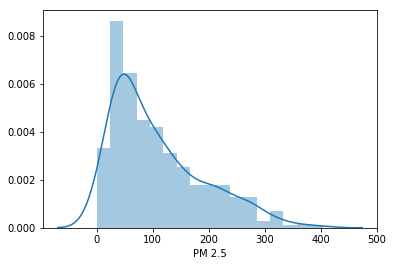

In [23]:
sns.distplot(y)

### Train Test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Comparison Linear, Ridge and Lasso Regression

## Linear Regression

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [26]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3499.356187290209


## Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3354.6171573071274


## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [31]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\MSI_PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MSI_PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MSI_PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MSI_PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

{'alpha': 5}
-3356.410256970683


#### Model Evaluation

In [40]:
prediction=lasso_regressor.predict(X_test)

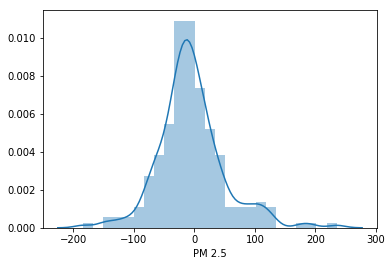

In [41]:
sns.distplot(y_test-prediction)

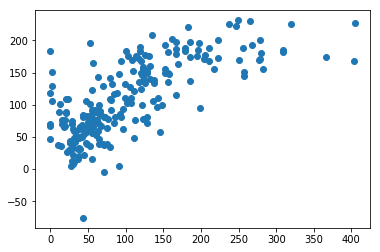

In [34]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.15696946997222
MSE: 3103.2651026603376
RMSE: 55.706957399056876


In [37]:
import pickle 

In [38]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)